# Text Sentiment Analysis

- identifies the subjective information from text by classifying it as positive, neutral or negative.
- an automated method to clasify opinions as negative, positive or neutral.
- Lexicon-based: count number of positive and negative words in given text and see which side is more.
- Machine learning based: train a classifier using the pre-labeled dataset with all the classes i.e. positive, negative, and neutral.
- Example:
    - "The rooms in the hotel were too smelly."
        - The sentence is expressing a negative opinion about the hotel.
        - Particularly, about the "rooms".
        - Since particular features ( i.e. aspects) are emphasized -> aspect-based sentiment analysis.

#### Performing Sentiment Analysis using Text Classification
- We will use Multi-Nomial Naive Bayes Classification using scikit-learn.
- Problem: "Sentiment Analysis of Movie Reviews"  using the dataset from https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data .

#### Pandas
- Popular Python library for data manipulation and analysis.

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
data=pd.read_csv('data/movie_reviews/train.tsv', sep='\t')

In [3]:
# check related information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


##### Lets do some Exploratory analysis

In [4]:
# Explore the data
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [5]:
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

#### There are 5 sentiment labels:
- 0 - negative 
- 1 - somewhat negative 
- 2 - neutral 
- 3 - somewhat positive 
- 4 - positive

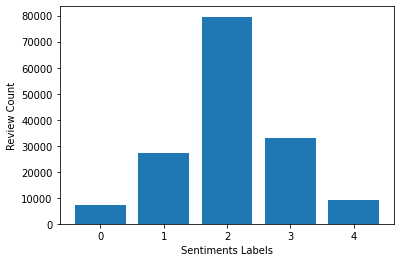

In [6]:
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Sentiments Labels')
plt.ylabel('Review Count')
plt.show()

#### Feature Generation with Bag of Words(BoW)
- Feature generation is done by transforming the text into a numerical representation, usually a vector.
- BoW is the process of extracting features from the text. 
- It converts text into the matrix of occurrence of words within a document (document-term matrix), i.e. it shows if given words is present or not in a document.

- Document-term matrix example:

![TDM](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/assets/feml_0405.png)

BOW -> turns arbitrary text into fixed-length vectors by counting how many times each word appears. Also called Vectorization.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

#### Split train and test set
-  For unbiased examination of performance of the ML algorithm we need to divide the dataset into a training set and a test set.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

#### Model Building
- ML algorithm: Multinomial Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)

#### Lets do the prediction

In [10]:
predicted= clf.predict(X_test)

#### How about the accuracy?

In [11]:
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


- The classifier performacne got is 60.49% using CountVector(or BoW), which is not considered as good accuracy.
- A limitations of Naive Bayes i.e. the assumption of independent predictors. 
- How can we improve it?
    - Can we use features based on TFIDF?
    - any other better algorithms?
    - How about the input datasize?
    - or...?

## References:
- https://monkeylearn.com/sentiment-analysis/
- https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
- https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/ch04.html
